Notebook showing usage of the data detective package.

**References**
* https://facebook.github.io/prophet/

In [1]:
from HASS_data_detective import DataParser 
from helpers import load_url
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename = '/Users/robincole/Desktop/hass_db_url.json'
DB_URL = load_url(filename)

## Load the complete db

In [3]:
%%time
parser = DataParser(DB_URL)

/Users/robincole/Documents/Github/HASS-data-detective/HASS_data_detective.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  sensors_df['state'] = sensors_df['state'].astype('float')


CPU times: user 6.26 s, sys: 1.87 s, total: 8.12 s
Wall time: 3min 1s


In [4]:
parser.list_sensors

['sensor.bme680temperature',
 'sensor.bme680air_qual',
 'sensor.electric_charger_distance',
 'sensor.network_up',
 'sensor.bme680humidity',
 'sensor.bme680pressure',
 'sensor.darksky_sensor_precip_probability',
 'sensor.darksky_sensor_temperature',
 'sensor.blink_blink_camera_percy_temperature',
 'sensor.mean_temperature',
 'sensor.robins_iphone_battery_level',
 'sensor.blink_blink_camera_percy_notifications',
 'sensor.iphone_battery_level',
 'sensor.bayes_probability',
 'sensor.work_to_home',
 'sensor.home_to_work',
 'sensor.home_to_waterloo',
 'sensor.memory_usage_real',
 'sensor.volume_used_volume_1',
 'sensor.cpu_load_total',
 'sensor.hall_temperature',
 'sensor.living_room_temperature',
 'sensor.bedroom_temperature',
 'sensor.next_train_in',
 'sensor.speedtest_download',
 'sensor.next_train_to_wim',
 'sensor.time_in_bed',
 'sensor.homeassistant_v2db']

In [5]:
parser.get_sensors.head()

entity,sensor.bayes_probability,sensor.bedroom_temperature,sensor.blink_blink_camera_percy_notifications,sensor.blink_blink_camera_percy_temperature,sensor.bme680air_qual,sensor.bme680humidity,sensor.bme680pressure,sensor.bme680temperature,sensor.cpu_load_total,sensor.darksky_sensor_precip_probability,...,sensor.mean_temperature,sensor.memory_usage_real,sensor.network_up,sensor.next_train_in,sensor.next_train_to_wim,sensor.robins_iphone_battery_level,sensor.speedtest_download,sensor.time_in_bed,sensor.volume_used_volume_1,sensor.work_to_home
last_changed,,,,,,,,,,,,,,,,,,,,,
2018-01-23 07:16:58.762162,0.2,18.19,1.0,18.0,7549489.0,45.957,1016.85,22.07,2.0,0.0,...,18.12,53.0,5.5,1.0,1.0,100.0,10.79,7.16,19.7,38.0
2018-01-23 07:16:58.910505,0.2,18.19,1.0,18.0,7549489.0,45.957,1016.85,22.07,2.0,0.0,...,18.12,53.0,5.5,1.0,1.0,100.0,10.79,0.00,19.7,38.0
2018-01-23 07:16:59.094701,0.2,18.19,1.0,18.0,7549489.0,45.957,1016.85,22.07,2.0,0.0,...,18.12,53.0,5.5,1.0,28.0,100.0,10.79,0.00,19.7,38.0
2018-01-23 07:17:04.256479,0.2,18.19,1.0,18.0,7549489.0,45.957,1016.85,22.07,2.0,0.0,...,18.12,53.0,5.5,1.0,28.0,100.0,10.79,0.00,19.7,38.0
2018-01-23 07:17:04.484865,0.2,18.19,1.0,18.0,7549489.0,45.957,1016.85,22.07,2.0,0.0,...,18.12,53.0,5.5,1.0,28.0,100.0,10.79,0.00,19.7,38.0


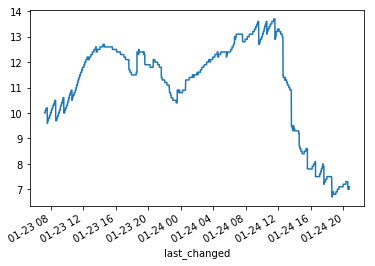

In [15]:
parser.get_sensors['sensor.darksky_sensor_temperature'].plot();

#### Plot a single sensor
Convenience to plot a single sensor.

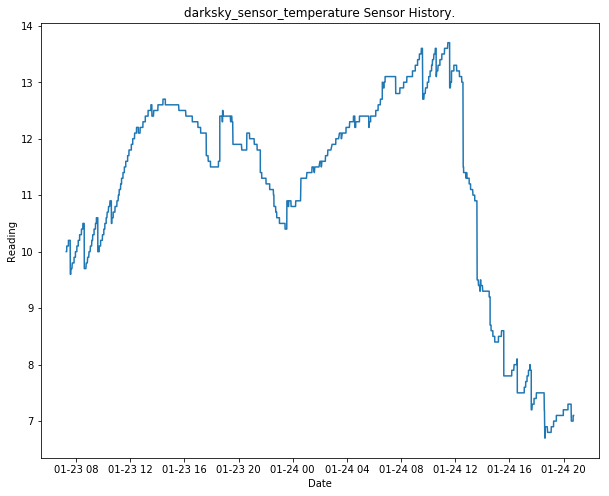

In [8]:
sensor = 'sensor.darksky_sensor_temperature'
parser.plot_sensor(sensor)

#### Pairplot
A seaborn pair plot to identify correlations.

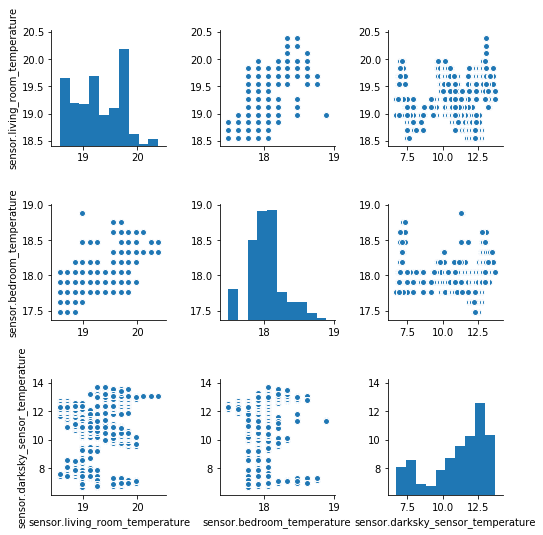

In [17]:
parser.sensor_pairplot(['sensor.living_room_temperature',
                        'sensor.bedroom_temperature',
                        'sensor.darksky_sensor_temperature'])

#### Prediction with prophet
Lets do some forecasting using prophet.

In [10]:
%%time
sensor = 'sensor.darksky_sensor_temperature'
model, future = parser.prophet_model(sensor, periods=365, freq='H')

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


CPU times: user 9.34 s, sys: 212 ms, total: 9.55 s
Wall time: 34.1 s


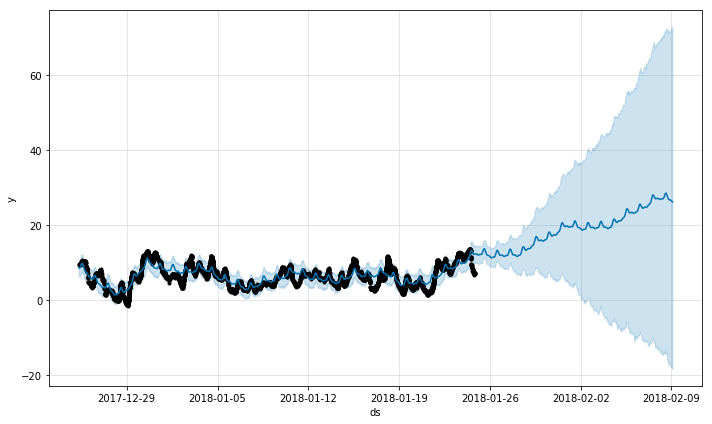

In [11]:
model.plot(future)
plt.show()

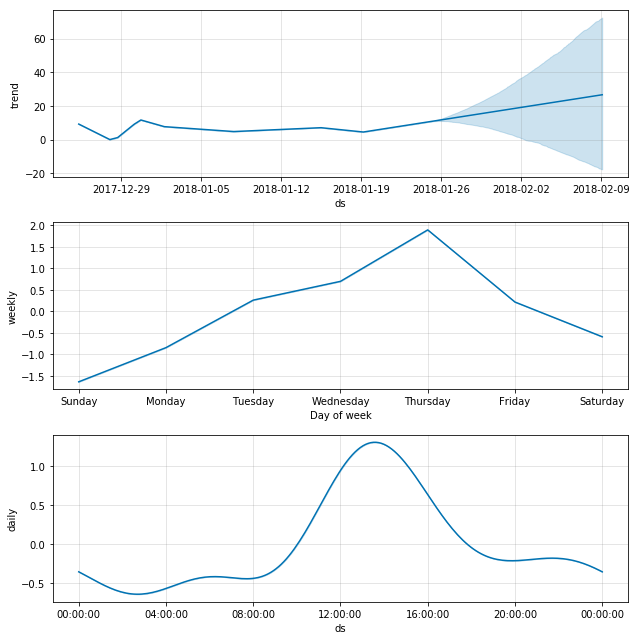

In [12]:
model.plot_components(future)
plt.show()

Clearly the daily trend is for the warmest temperatures at early afternoon